In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
df=pd.read_csv(r"c:\users\user\Downloads\Data_file - data_file (1).csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4), int64(5

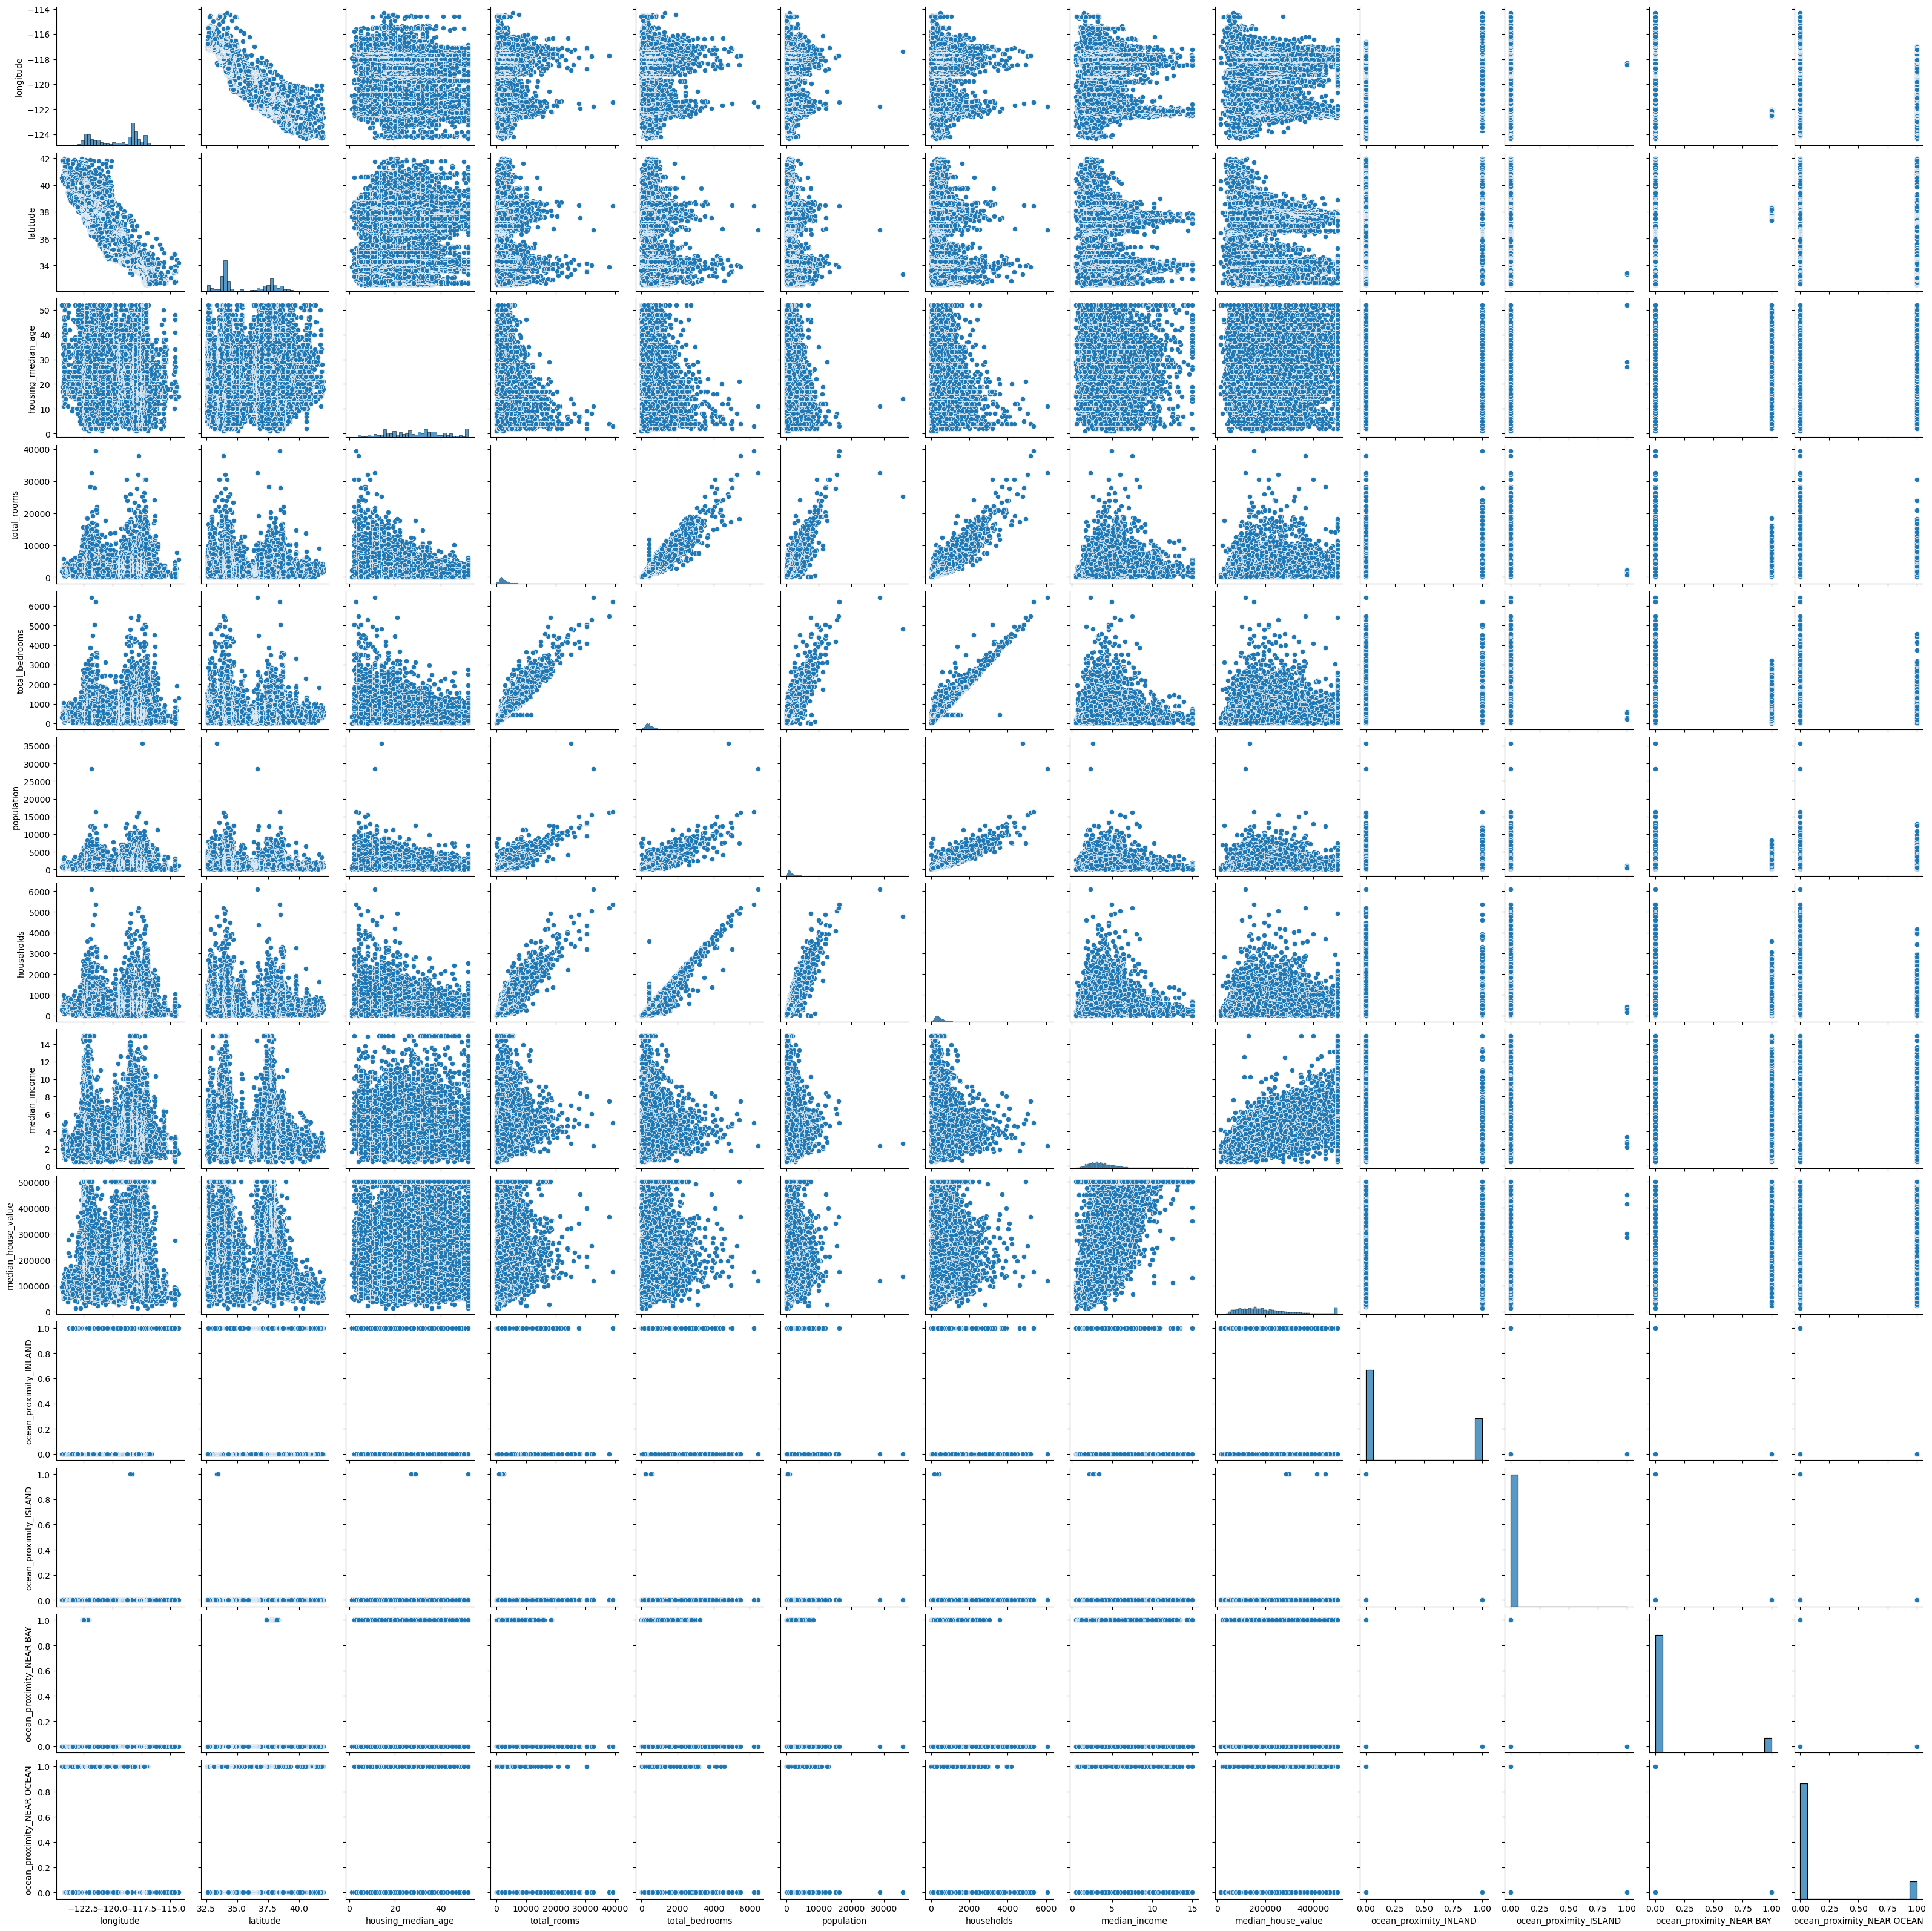

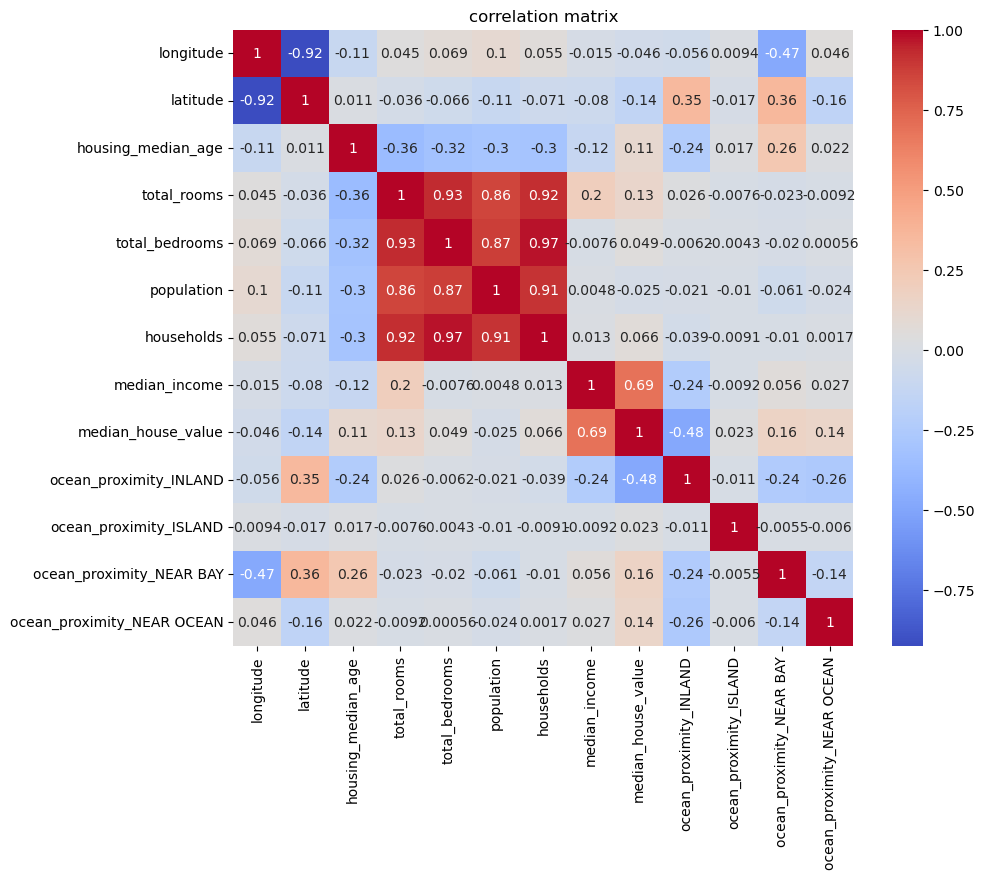

In [13]:
sns.pairplot(df)
plt.show()

correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()



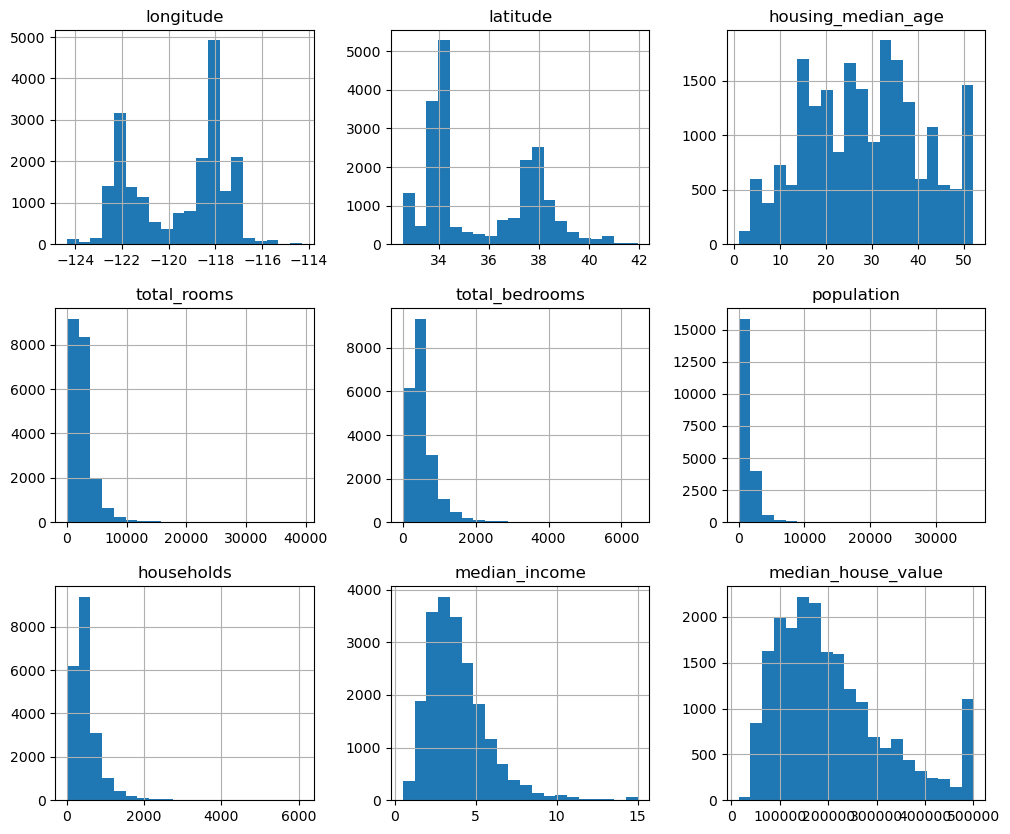

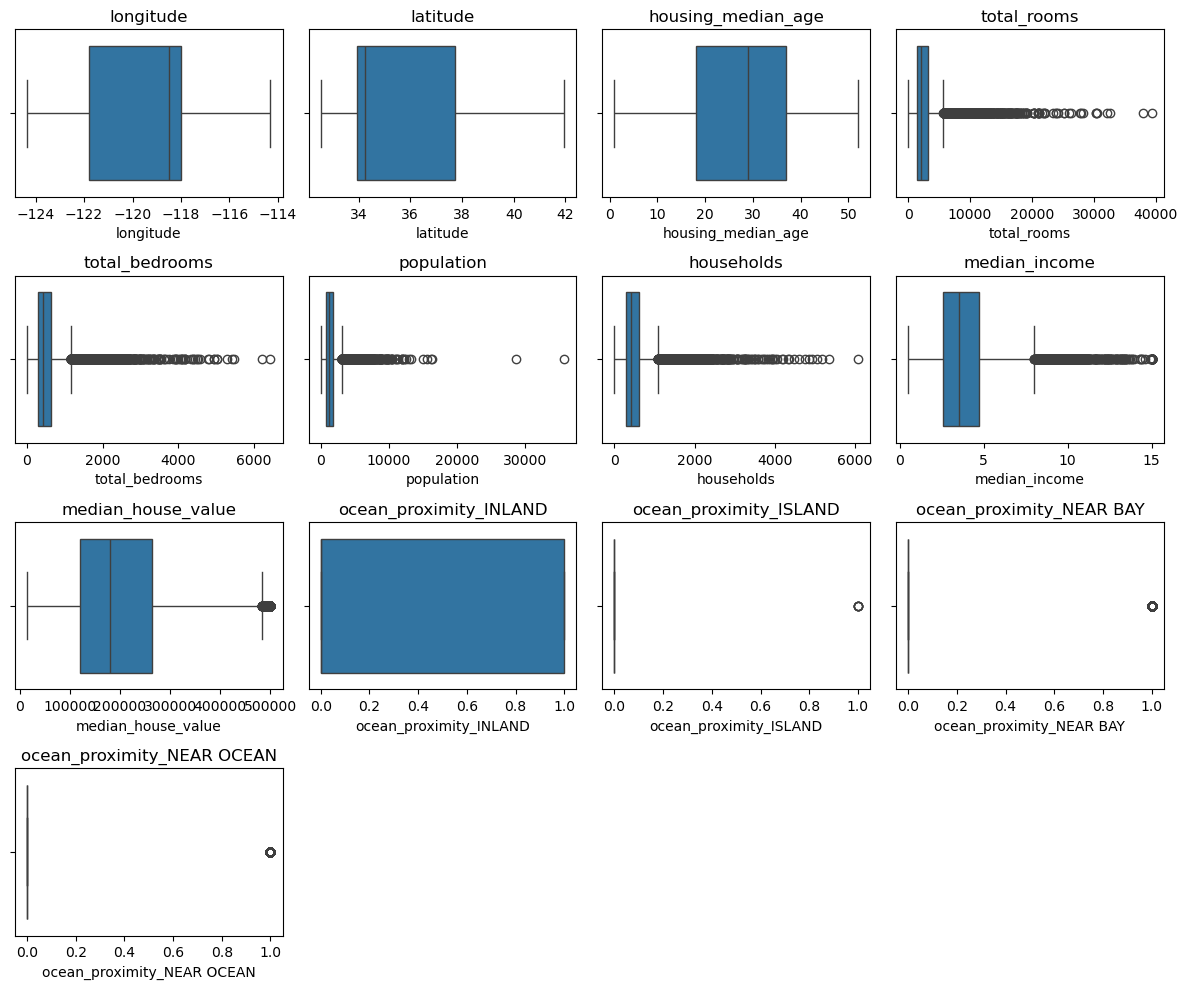

In [14]:
df.hist(figsize=(12,10), bins=20)
plt.show()

plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[column]) 
    plt.title(column)
plt.tight_layout()
plt.show()



In [15]:
X=df[['median_income']]
y=df['median_house_value']


In [51]:
#splitting into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)


In [53]:
simple_model=LinearRegression()
simple_model.fit(X_train,y_train)


LinearRegression()

mean squared error : 7091157771.76555
r^2 score : 0.45885918903846656


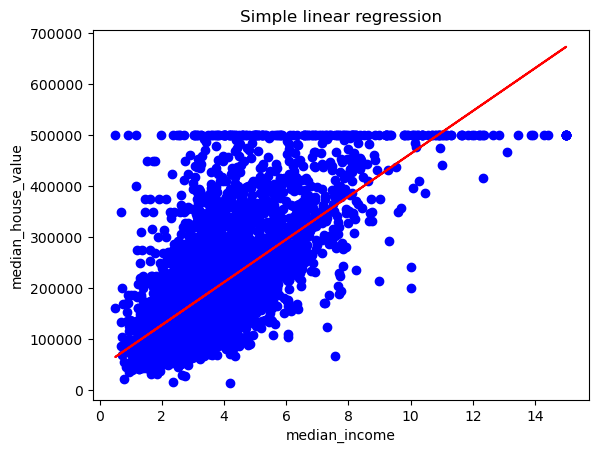

In [55]:
y_pred=simple_model.predict(X_test)

#evaluation metrics
print(f'mean squared error : {mean_squared_error(y_test,y_pred)}')
print(f'r^2 score : {r2_score(y_test,y_pred)}')

plt.scatter(X_test,y_test,color='blue',label='actual data')
plt.plot(X_test,y_pred,color='red',label='regression line')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Simple linear regression')
plt.show()


In [57]:

median_income = 6.4545

# Create a DataFrame with the correct column name used during training
median_income_df = pd.DataFrame([[median_income]], columns=['median_income'])

# Make prediction
predicted_value = simple_model.predict(median_income_df)

# Display the result
print(f"The predicted house price for median income of {median_income} is: ${predicted_value[0]:,.2f}")


The predicted house price for median income of 6.4545 is: $315,121.76


In [59]:
#multiple regression
X_multi = df[['median_income', 'housing_median_age', 'total_rooms', 'population', 'households']]
y_multi = df['median_house_value']


In [61]:
X_train_multi,X_test_multi,y_train_multi,y_test_multi= train_test_split(X_multi,y_multi,test_size=0.2,random_state=42)

In [65]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi,y_train_multi)


LinearRegression()

In [67]:
y_pred_multi= multi_model.predict(X_test_multi)

#evaluation metrics
print(f'Mean Squared Error : {mean_squared_error(y_test_multi,y_pred_multi)}')
print(f'r^2 Score : {r2_score(y_test_multi,y_pred_multi)}')






Mean Squared Error : 5909928044.702567
r^2 Score : 0.5490012551168502


In [ ]:
## 📌 Conclusion

In this project, we focused on predicting the **median house value** in various **California districts** using both **Simple Linear Regression** and **Multiple Linear Regression** models.

---

### ✅ Key Insights:

- **Median Income** emerged as the most influential feature impacting house prices.
- **Simple Linear Regression** helped us understand the impact of individual features but had limited predictive power.
- **Multiple Linear Regression** significantly improved performance by capturing relationships across multiple variables.

---


---

### 📁 Project Summary:

This notebook demonstrated the full lifecycle of a regression task:
- Data loading and exploration
- Preprocessing and cleaning
- Regression modeling
- Model evaluation and comparison

The project successfully highlights the relationship between **district-level features** and **property values**, and sets the stage for more complex machine learning workflows.
